# Jyotsna Pandey

# Task 1 - Prediction of scores using number of hours studied using supervised Machine Learning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [3]:
Data = pd.read_csv("C:/Users/Admin/Documents/student_scores - student_scores.csv")

In [4]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


checking for the shape of dataset

In [5]:
Data.shape

(25, 2)

checking the range and distribution of values in both columns

In [6]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting values of both columns to visualise distribution of values

Text(0.5, 1.0, 'Scores')

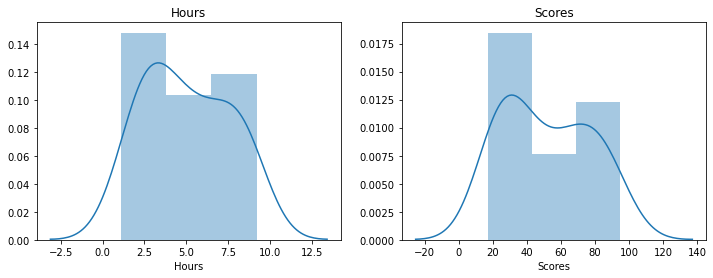

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.distplot(Data["Hours"], ax=ax[0])
ax[0].set_title('Hours')
sns.distplot(Data["Scores"], ax=ax[1])
ax[1].set_title('Scores')

Now plotting the boxplot to check for outliers

Text(0.5, 1.0, 'Scores')

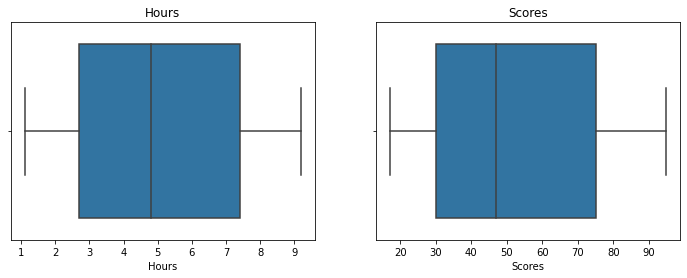

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(Data["Hours"], ax=ax[0])
ax[0].set_title('Hours')
sns.boxplot(Data["Scores"], ax=ax[1])
ax[1].set_title('Scores')

From the boxplot we can see that no outliers present in dataset

Now checking for null values 

In [17]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values is present in dataset

Now plotting scatter plot between Hours and scores to visualise the correlation between input and output

Text(0, 0.5, 'Score')

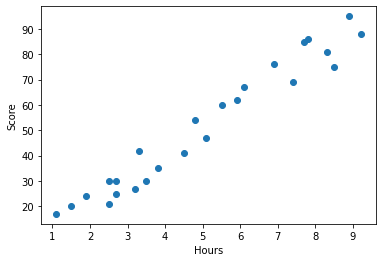

In [18]:
plt.scatter(Data["Hours"],Data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Score")

From the plot we can see that very strong correlation exits between Hours and Scores

In [20]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing Data for applying algorithm

Now we will divide the data into train and test

In [50]:
X = Data.iloc[:,:-1].values
y = Data.iloc[:,1].values

In [51]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Training set contains 80% data whereas test set contains 20% data

Plotting the regression line

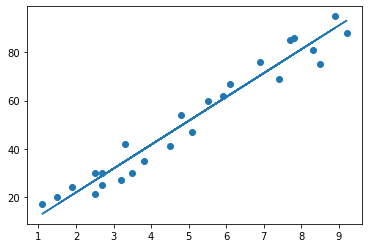

In [64]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line)

# Training the model

In [54]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

Now checking the value of slope and intercept of regression equation

In [58]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


# Making predictions

In [59]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [60]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now using the regression equation predicting the score if no. of hours is 9.25

In [61]:
hours = 9.25
arr = np.array(hours)
hour = arr.reshape(1,-1)
own_pred = regressor.predict(hour)

In [62]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating model

In [65]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)

In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
